In [1]:
import pandas as pd

df_train = pd.read_csv('../data/tesla/train.csv')
df_test = pd.read_csv('../data/tesla/test.csv')

df_train

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1348,2015-11-04,227.000000,232.740005,225.199997,231.630005,12726400,231.630005
1349,2015-11-05,230.580002,234.580002,229.190002,231.770004,4496800,231.770004
1350,2015-11-06,230.699997,233.360001,229.500000,232.360001,2445300,232.360001
1351,2015-11-09,232.990005,232.990005,224.309998,225.330002,3850900,225.330002


In [2]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

target_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

features_columns = []

for col in target_columns:
    for i in range(1, 4):
        df_train[f'{col}_lag_{i}'] = df_train[col].shift(i)
        features_columns.append(f'{col}_lag_{i}')

df_train.dropna()

X_train = df_train[features_columns]
Y_train = df_train[target_columns]

X_train.shape, Y_train.shape

((1353, 18), (1353, 6))

In [39]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=2)

model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=2)

In [3]:
df_test['Date'] = pd.to_datetime(df_test['Date'])

target_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

features_columns = []

for col in target_columns:
    for i in range(1, 4):
        df_test[f'{col}_lag_{i}'] = df_test[col].shift(i)
        features_columns.append(f'{col}_lag_{i}')

df_test.dropna()

X_test = df_test[features_columns]
Y_test = df_test[target_columns]

X_test.shape, Y_test.shape

((339, 18), (339, 6))

In [40]:
Y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

r2_score(Y_test, Y_pred), mean_absolute_percentage_error(Y_test, Y_pred)

(-0.7196144265820488, 0.17349925556744195)

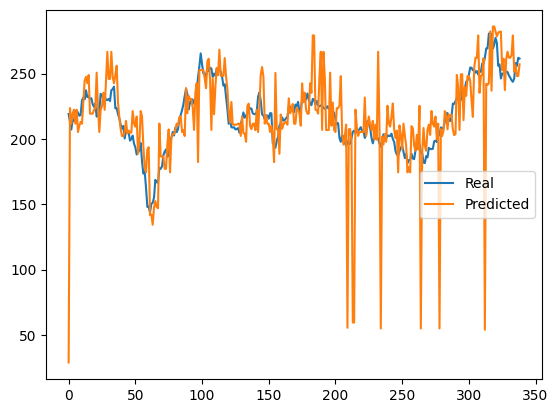

In [30]:
import matplotlib.pyplot as plt

plt.plot(Y_test['Close'], label='Real')
plt.plot(Y_pred[:, 3], label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

list_depth = [i * 10 for i in range(1, 51)]
list_r2_score = []

for depth in list_depth:
    model = RandomForestRegressor(n_estimators=100, max_depth=depth)

    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    r2 = r2_score(Y_test, Y_pred)

    list_r2_score.append(r2)

plt.plot(list_depth, list_r2_score)

NameError: name 'plt' is not defined

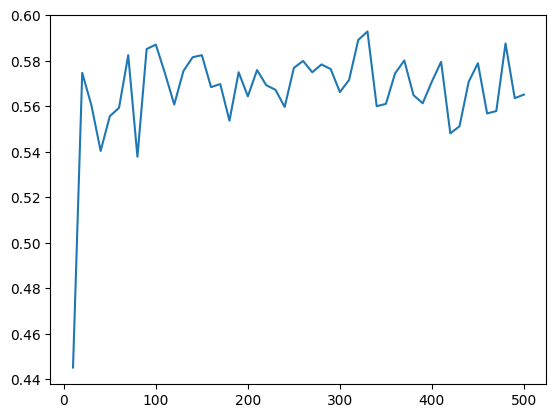

In [6]:
import matplotlib.pyplot as plt

plt.plot(list_depth, list_r2_score)